# `Практикум по программированию на языке Python`

## `Задание 01. Полносвязная нейронная сеть на numpy`.

#### Фамилия, имя:

Дата выдачи: <span style="color:red">__13 февраля__</span>.

Мягкий дедлайн: <span style="color:red">__28 февраля 05:00__</span>.

Стоимость: __10 баллов__ (основная часть заданий) + __3 балла__ (дополнительные задания).

<span style="color:red">__В ноутбуке все клетки должны выполняться без ошибок при последовательном их выполнении.__</span>

#### `Москва, 2025`

In [1]:
import numpy as np

## `Теоретическая часть (3 балла)`

В этом блоке вам нужно решить 3 задания.

### `Задание 1. Градиенты для слоя Batch normalization (1.5 балла)`

Рассмотрим слой Batch normalization. Пусть на вход этого слоя был подан батч из $n$ объектов, при этом у всех объектов по 1 признаку. Представим вход BN слоя в виде $X \in \mathbb{R}^{n \times 1}$.

Тогда в этом слое производятся следующие вычисления:

$$ \mu = \frac1n \sum_{i=1}^{n} X_i $$

$$ \sigma^2 = \frac1n \sum_{i=1}^{n} \left( X_i - \mu \right) ^2 $$

$$ \tilde{y_i} = \frac{X_i - \mu}{\sqrt{\sigma^2 + \varepsilon}} $$

$$ y_i = \gamma \tilde{y_i} + \delta $$

Выходом BN слоя является $y_i$, а $\gamma,\delta\in\mathbb{R}$ — параметры, которые подбираются во время обучения вместе с другими параметрами нейронной сети (наряду, например, с весами линейного слоя).

Рассмотрим нейронную сеть, в которой есть BN слой. Предположим, что вычисления в нейронной сети завершаются подсчетом функции потерь $\mathcal{L}$. Пусть мы выполнили прямой проход по нейронной сети и сейчас делаем обратный проход с помощью метода обратного распространения ошибки. Пусть BN слою пришел градиент функции потерь по выходу BN слоя ($\nabla_{y} \mathcal{L}$).

В этом задании вам нужно записать вычисление градиента функции потерь по параметрам слоя BN $\gamma$ и $\delta$ ($\nabla_{\gamma} \mathcal{L}$, $\nabla_{\delta} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$, а также вам нужно записать вычисление градиента функции потерь по входу слоя BN $X$ ($\nabla_{X} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$.

Хочу заметить, в данном задании мы рассматриваем объекты всего с 1 признаком, чтобы упростить выкладки.

__Ваше решение:__

$$
\nabla_{\gamma}L=\sum_{i=1}^n\frac{\partial L}{\partial y_i}\frac{\partial y_i}{\partial\gamma}=\sum_{i=1}^n\nabla_{y_i}L\cdot\tilde{y}_i
$$
$$
\quad \nabla_{\delta}L=\sum_{i=1}^n\frac{\partial L}{\partial y_i}\frac{\partial y_i}{\partial\delta}=\sum_{i=1}^n\nabla_{y_i}L
$$
$$\quad \nabla_{X_i}L=\frac{\gamma}{\sqrt{\sigma^2+\epsilon}}\Bigl(\nabla_{y_i}L-\frac{1}{n}\sum_{j=1}^n\nabla_{y_j}L\Bigr)-\frac{\gamma(X_i-\mu)}{n(\sigma^2+\epsilon)^{3/2}}\sum_{j=1}^n\nabla_{y_j}L\,(X_j-\mu)
$$

### `Задание 2. Вывод инициализации весов линейного слоя при использовании ReLU в качестве функции активации (1 балл)`

Рассмотрим полносвязную нейронную сеть с функцией активации $g(y)$. Пусть сеть состоит из $L$ слоев и размер входа слоя $l$ равен $n_l\ \ (l = \overline{1, L})$.

Обозначим за $x^l \in \mathbb{R}^{n_{l}}$ вход слоя $l$, за $y^l \in \mathbb{R}^{n_{l+1}}$ — выход слоя $l$, за $W^l \in \mathbb{R}^{n_{l+1} \times n_{l}}$ — веса слоя $l$, за $b^l \in \mathbb{R}^{n_{l+1}}$ — вектор сдвига слоя $l$.

Тогда
$$y^l = W^l x^l + b^l,$$
$$x^{l+1} = g(y^l).$$

На паре вы выводили хорошую инициализацию для линейного слоя в случае, когда в качестве функции активации $g(y)$ в нейронной сети используется гиперболический тангенс $g(y) = \tanh(y)$. Сейчас вам нужно сделать подобный вывод для случая, когда в сети в качестве функций активации используется $g(y) = ReLU(y) = \max(0, y)$.

Сделаем следующие предположения насчет того, как распределены веса $W^l$, вектор сдвига $b^l$, входной вектор $x^l$, выходной вектор $y^l$ линейного слоя и градиенты функции потерь $\frac{\partial L}{\partial y^{l}}$ $(l = \overline{1, L}$):

1. Все компоненты в $W^l$ распределены одинаково и независимо друг от друга;
2. Все компоненты в $y^l$ распределены одинаково и независимо друг от друга;
3. Все компоненты в $x^l$ распределены одинаково и независимо друг от друга;
4. Все компоненты в $\frac{\partial L}{\partial y^{l}}$ распределены одинаково и независимо друг от друга;
5. Все компоненты в $W^l$ и все компоненты в $x^l$ независимы друг от друга;
6. Все компоненты в $W^l$ имеют четную плотность распределения (то есть симметричную относительно нуля: $p_{W^l}(-x) = p_{W^l}(x)$);
7. Все компоненты в $W^l$ имеют конечное матожидание;
8. Вектор $b^l$ инициализирован нулями.


Подсказки:
1. Из пунктов 6 и 7 следует, что все компоненты в $W^l$ имеют нулевое среднее ($\mathbb{E} W^l_{ij} = 0\ \ \forall i = \overline{1, n_{l+1}}, j = \overline{1, n_{l}}$) (докажите);
2. Из пунктов 6 и 7 следует, что все компоненты в $y^l$ имеют нулевое среднее и четную плотность распределения (докажите).

__Ваше решение:__

...

### `Задание 3. Почему функция активации` $ReLU(y) = \max(0, y)$ `предпочтительней сигмоиды` $\sigma(y) = \frac{1}{1 + \exp(-y)}$ `в нейронных сетях? (0.5 балла)`

Дайте развернутый ответ на вопрос "Почему функция активации $ReLU(y) = \max(0, y)$ предпочтительней сигмоиды $\sigma(y) = \frac{1}{1 + \exp(-y)}$ в нейронных сетях?"

__Ваш ответ:__

* градиентный взрыв - при использовании сигмоиды может возникать ситуация, когда градиенты значительно увеличиваются, что приводит к проблемам при обновлении весов. ReLU же помогает избежать этого эффекта.

* затухание градиента - сигмоида способна вызывать исчезновение градиентов, поскольку её производная может быть крайне мала, что затрудняет корректное обновление весов в ранних слоях сети. В отличие от неё, ReLU сохраняет стабильный градиент для положительных значений входа, предотвращая затухание.

* вычислительная эффективность и стабильность - ReLU проще в реализации, поскольку представляет собой пороговую функцию, тогда как сигмоида требует вычисления экспоненты, что является более затратной и менее стабильной операцией.

* более быстрая сходимость - Благодаря описанным свойствам — стабильному градиенту, отсутствию градиентного взрыва и меньшим вычислительным затратам — нейронные сети с активацией ReLU, как правило, обучаются быстрее по сравнению с сетями, использующими сигмоиду.

---

## `Практическая часть (7 баллов)`

### `Реализация нейронной сети (3 балла)`

В этом задании вы обучите полносвязную нейронную сеть распознавать рукописные цифры (а что же еще, если не их :), [почти] самостоятельно реализовав все составляющие алгоритма обучения и предсказания.

Для начала нам понадобится реализовать прямой и обратный проход через слои. Наши слои будут соответствовать следующему интерфейсу (на примере "тождественного" слоя):

In [2]:
class IdentityLayer:
    """
    A building block. Each layer is capable of performing two things:

    - Process input to get output:
    output = layer.forward(input)

    - Propagate gradients through itself:
    grad_input = layer.backward(input, grad_output)

    Some layers also have learnable parameters.

    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """
        Here you can initialize layer parameters (if any)
        and auxiliary stuff. You should enumerate all parameters
        in self.params
        """
        # An identity layer does nothing
        self.params = []
        pass

    def forward(self, input):
        """
        Takes input data of shape [batch, input_units],
        returns output data [batch, output_units]
        """
        # An identity layer just returns whatever it gets as input.
        self.input = input
        return input

    def backward(self, grad_output):
        """
        Performs a backpropagation step through the layer,
        with respect to the given input.

        To compute loss gradients w.r.t input,
        you need to apply chain rule (backprop):

        d `loss` / d `input` = (d `loss` / d `layer`) * (d `layer` / d `input`)

        Luckily, you already receive d `loss` / d `layer` in argument,
        so you only need to multiply it by d `layer` / d `input`.

        NB: Sometimes d `layer` / d `input` can be a 3D or even 4D tensor.
        So it's better to write down the `loss` differential and extract
        d `layer` / d `input` from it so that only 2D tensors were present.

        The method returns:
        * gradient w.r.t input (will be passed to
          previous layer's backward method)
        * flattened gradient w.r.t. parameters (with .ravel()
          applied to each gradient).
          If there are no params, return []
        """
        # The gradient of an identity layer is precisely grad_output
        input_dim = self.input.shape[1]

        d_layer_d_input = np.eye(input_dim)

        return np.dot(grad_output, d_layer_d_input), [] # chain rule

#### `Слой нелинейности ReLU`

Для начала реализуем слой нелинейности $ReLU(y) = \max(0, y)$. Параметров у слоя нет. Метод `forward` должен вернуть результат поэлементного применения $ReLU$ к входному массиву, метод `backward` — градиент функции потерь по входу слоя. В нуле будем считать производную равной 0. Обратите внимание, что при обратном проходе могут понадобиться величины, посчитанные во время прямого прохода, поэтому их стоит сохранить как атрибут класса.

In [3]:
class ReLU:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        self.params = [] # ReLU has no parameters

    def forward(self, input):
        """Apply elementwise ReLU to [batch, num_units] matrix"""
        self.input = input
        return np.maximum(0, input)

    def backward(self, grad_output):
        """Compute gradient of loss w.r.t. ReLU input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return grad_output * (self.input > 0), []

    def __repr__(self):
        return 'Relu()'

#### `Полносвязный слой`

Далее реализуем полносвязный слой без нелинейности. У слоя два параметра: матрица весов и вектор сдвига.

Обратите внимание на второй аргумент: в нем надо возвращать градиент по всем параметрам в одномерном виде. Для этого надо сначала применить `.ravel()` ко всем градиентам, а затем воспользоваться `np.r_`:

In [4]:
# example
np.r_[np.eye(3).ravel(), np.arange(4)]

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2., 3.])

In [5]:
class Dense:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self, input_units, output_units):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = x W + b
        """
        # initialize weights with small random numbers from normal distribution
        self.weights = np.random.randn(input_units, output_units) * 0.01
        self.biases = np.zeros(output_units)
        self.params = [self.weights, self.biases]

    def forward(self,input):
        """
        Perform an affine transformation:
        f(x) = x W + b

        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        self.input = input
        return np.dot(input, self.weights) + self.biases

    def backward(self, grad_output):
        """
        compute gradients
        grad_output shape: [batch, output_units]
        output shapes: [batch, input_units], [num_params]

        hint: use function np.r_
        np.r_[np.arange(3), np.arange(3)] = [0, 1, 2, 0, 1, 2]
        """
        grad_input = np.dot(grad_output, self.weights.T)
        grad_params = np.r_[np.dot(self.input.T, grad_output).ravel(), np.sum(grad_output, axis=0).ravel()]
        return grad_input, grad_params

    def __repr__(self):
        return f'Dense({self.weights.shape[0]}, {self.weights.shape[1]})'

#### `Проверка градиента`

Проверим правильность реализации с помощью функции численной проверки градиента. Функция `eval_numerical_gradient` принимает на вход callable объект `f` (функцию от одного аргумента-матрицы) и аргумент `x` и вычисляет приближенный градиент функции `f` в точке `x`.

In [6]:
def eval_numerical_gradient(f, x, verbose=False, h=0.00001):
    """
    Evaluates gradient df/dx via finite differences:
    df/dx ~ (f(x+h) - f(x-h)) / 2h
    Adopted from https://github.com/ddtm/dl-course/
    """
    fx = f(x) # evaluate function value at original point
    grad = np.zeros_like(x)
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # restore

        # compute the partial derivative with centered formula
        grad[ix] = (fxph - fxmh) / (2 * h) # the slope
        if verbose:
            print (ix, grad[ix])
        it.iternext() # step to next dimension

    return grad

Вычислите аналитический и численный градиенты по входу слоя ReLU от функции
$$ f(y) = \sum_i y_i, \quad y = ReLU(x) $$

Выпишите аналитический градиент в этой ячейке:

$$\frac{\partial f}{\partial x_i}=\frac{\partial f}{\partial y_i}\frac{\partial\,\mathrm{ReLU}(x_i)}{\partial x_i}=1\cdot\begin{cases}1,&x_i>0,\\0,&x_i<0,\end{cases}\quad $$


Следующая ячейка после заполнения должна не выдавать ошибку :)

In [7]:
relu = ReLU()
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

activations = relu.forward(points)
grads = relu.backward(np.ones_like(activations))[0]
numeric_grads = eval_numerical_gradient(lambda x: np.sum(relu.forward(x)), points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

Вычислите аналитический и численный градиенты по входу полносвязного слоя от функции
$$ f(y) = \sum_i y_i, \quad y = W x + b $$

Выпишите аналитический градиент в этой ячейке (советуем выписать градиент через дифференциал функции $f$):

$$\frac{\partial f}{\partial x_j}=\frac{\partial f}{\partial y_i}\frac{\partial (Wx+b)_i}{\partial x_j}=\sum_i 1\cdot W_{ij}=\sum_i W_{ij}$$


Следующая ячейка после заполнения должна не выдавать ошибку :)

In [8]:
linear = Dense(12, 32)
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

grads = linear.backward(np.ones_like(linear.forward(points)))[0]
numeric_grads = eval_numerical_gradient(lambda x: np.sum(linear.forward(x)), points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

#### `Реализация softmax-слоя и функции потерь`

Для решения задачи многоклассовой классификации обычно используют $softmax$ в качестве нелинейности на последнем слое, чтобы получить вероятности классов для каждого объекта:
$$\hat y = softmax(x)  = \left \{\frac {\exp(x^i)}{\sum_{j=1}^K \exp(x^j)} \right \}_{i=1}^K, \quad K - \text{число классов.}$$

Здесь за $x^i$ мы обозначаем $i$-ый признак объекта $x$.

В качестве функции потерь выберем отрицательный логарифм правдоподобия (по английски: negative log likelihood или NLL)
$$L(y, \hat y) = -\sum_{i=1}^K y^i \log \hat y^i,$$
где $y^i = 1$, если объект принадлежит $i$-му классу, и $y^i = 0$ иначе.

NLL совпадает с выражением для [кросс-энтропии](https://ru.wikipedia.org/wiki/Перекрёстная_энтропия) (в качестве первого распределения берем вырожденное распределение $y$, в качестве второго — предсказанное распределение $\hat y$). Очевидно, что эту функцию потерь также можно переписать через индексацию, если через $y$ обозначить класс данного объекта:
$$L(y, \hat y) = - \log \hat y_{y}$$

В таком виде ее удобно реализовывать.

Для обучения нейронной сети будем оптимизировать эту функцию потерь по параметрам нейронной сети:

$$ \frac1N \sum_{i=1}^N L(y_i, \hat y_i) = \frac1N \sum_{i=1}^N L(y_i, \text{NN}(x_i)) \rightarrow \min_{w}\,,$$
где за $x_i$ и $y_i$ мы обозначили признаки и таргет $i$-ого объекта обучающей выборки, за $\text{NN}$ мы обозначили нейронную сеть, которая по признакам объекта $x_i$ выдает распределение вероятностей $\hat y_i$, за $w$ мы обозначили все веса нейронной сети, а $N$ — это число объектов в обучающей выборке.

Реализуйте слой `LogSoftmax` (у этого слоя нет параметров). Метод `forward` должен вычислять логарифм от $softmax$, а метод `backward` — пропускать градиенты. В общем случае в промежуточных вычислениях `backward` получится трехмерный тензор, однако для нашей конкретной функции потерь все вычисления можно реализовать в матричном виде.  Поэтому мы будем предполагать, что аргумент `grad_output` — это матрица, у которой в каждой строке только одно ненулевое значение (не обязательно единица).

**Пожелание.** Постарайтесь максимально упростить формулу градиентов, чтобы получился лаконичный и стабильный код. Большие и страшные реализации часто оказываются нестабильными.

In [9]:
from scipy.special import logsumexp
# use this function instead of np.log(np.sum(np.exp(...))) because it is more stable

In [10]:
class LogSoftmax:
    def __init__(self):
        self.params = []

    def forward(self, input):
        """
        Applies softmax to each row and then applies component-wise log
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        """
        self.input = input
        self.logsoftmax = input - logsumexp(input, axis=1, keepdims=True)
        return self.logsoftmax

    def backward(self, grad_output):
        """
        Propagartes gradients.
        Assumes that each row of grad_output contains only 1
        non-zero element
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        Do not forget to return [] as second value (grad w.r.t. params)
        """
        return grad_output - np.exp(self.logsoftmax) * np.sum(grad_output, axis=1, keepdims=True), []

    def __repr__(self):
        return 'LogSoftmax()'

Реализуйте функцию потерь и градиенты функции потерь. Во время вычисления NLL усредняйте (а не суммируйте) значения функции потерь по батчу. Обычно так делают для того, чтобы при двух запусках обучения нейронной сети с разными размерами батча получаемые значения функции потерь у этих сетей были сравнимы.

In [11]:
def NLL(activations, target):
    """
    Returns negative log-likelihood of target under model represented by
    activations (log probabilities of classes, it's just output of LogSoftmax layer).
    `activations` has shape [batch, num_classes], `target` has shape [batch]
    Output shape: 1 (scalar).
    """
    return -np.mean(activations[np.arange(activations.shape[0]), target])


def grad_NLL(activations, target):
    """
    Returns gradient of negative log-likelihood w.r.t. activations.
    each arg has shape [batch, num_classes]
    output shape: [batch, num-classes]
    """
    grad = np.zeros_like(activations)
    grad[np.arange(activations.shape[0]), target] = -1 / activations.shape[0]
    return grad

Наконец, выполните проверку `LogSoftmax`-слоя, используя функцию потерь и ее градиент:

In [12]:
n = 50
d = 10
lsm = LogSoftmax()
target = np.random.choice(d, size=n)
points = np.random.uniform(-1, 1, n*d).reshape([n, d])

activations = lsm.forward(points)

grads = lsm.backward(grad_NLL(activations, target))[0]
numeric_grads = eval_numerical_gradient(lambda x: NLL(lsm.forward(x.reshape(n, d)), target), points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

### `Загрузка данных`

Мы реализаовали все архитектурные составляющие нашей нейронной сети. Осталось загрузить данные и обучить модель. Мы будем работать с датасетом `digits`, каждый объект в котором — это 8x8 изображение рукописной цифры.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
from sklearn.datasets import load_digits

In [15]:
X, y = load_digits(return_X_y=True)

In [16]:
X.shape, y.shape

((1797, 64), (1797,))

Разделим данные на обучение и контроль:

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

### `Сборка и обучение нейронной сети (0.8 балла)`

В нашей реализации мы представляем нейронную сеть в виде списка ее слоев. Например, следующая функция конструирует нейронную сеть заданной ширины (то есть с заданным размером скрытых слоев) и глубины (то есть с заданным количеством слоев) с заданным размером входа и выхода, а также с заданной функцией активации между линейными слоями.

In [20]:
def make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size

        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [21]:
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
network

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]

Реализуйте функцию, которая выполнет прямой проход по нейронной сети:

In [22]:
def forward(network, X):
    """
    Perform forward pass through the network.

    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output:
    output shape: [batch, out_features_num]
    """
    output = X
    for layer in network:
        output = layer.forward(output)
    return output

Для проверки, хорошо ли сеть обучилась, нам понадобится вычислять долю правильных ответов (accuracy) на данной выборке. Для этого реализуйте функцию, которая делает предсказания на каждом объекте (логично в качестве предсказания на очередном объекте выдавать тот класс, для которого предсказанный логарифм вероятности максимален):

In [23]:
def predict(network, X):
    """
    Returns predictions for each object in X.

    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: array of classes, each from 0 to 9
    output shape: [batch]
    """
    predictions = np.argmax(forward(network, X), axis=1)
    return predictions

Мы будем обучать параметры нейросети с помощью готовой функции оптимизации из модуля `scipy`:

In [24]:
from scipy.optimize import minimize

In [25]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

Эта функция имеет стандартный интерфейс: нужно передать callable объект, который вычисляет значение и градиент целевой функции, а также точку старта оптимизации — начальное приближение (одномерный `numpy`-массив). Поэтому нам понадобятся функции для сбора и задания всех весов нашей нейросети (именно для них мы всегда записывали параметры слоя в список `layer.params`)

In [26]:
def get_weights(network):
    weights = []
    for layer in network:
        for param in layer.params:
            weights += param.ravel().tolist()
    return np.array(weights)


def set_weights(weights, network):
    i = 0
    for layer in network:
        for param in layer.params:
            l = param.size
            param[:] = weights[i:i+l].reshape(param.shape)
            i += l

Вам нужно реализовать ту самую функцию, которую мы будем передавать в `minimize`. Эта функция должна брать на вход текущую точку (вектор всех параметров), а также список дополнительных параметров (мы будем передавать через них нашу сеть и обучающие данные) и возвращать значение критерия качества (NLL) и его градиент по параметрам модели.

In [27]:
def compute_loss_grad(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]

    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)

    Do not forget to set weights of the network!
    """
    network, X, y = args
    set_weights(weights, network)
    out = forward(network, X)
    loss = NLL(out, y)
    grad_curr = grad_NLL(out, y)
    grad_list = []
    for layer in reversed(network):
        grad_curr, params = layer.backward(grad_curr)
        grad_list.insert(0, params)
    flat_grad = np.concatenate(grad_list)
    return loss, flat_grad

Теперь мы готовы обучать нашу нейросеть.

In [28]:
weights = get_weights(network)

In [29]:
res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    method="L-BFGS-B",                # optimization method
    jac=True                          # says that gradient is computed in fun
)

In [30]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [31]:
res["nit"] # number of iterations (should be >> 10)

89

In [32]:
res["success"] # should be True

True

In [33]:
res["x"] # leraned weights

array([-3.07575500e-03,  3.57411966e-03, -7.08555228e-04, ...,
       -1.01817053e+00, -2.28273781e+00, -2.45496956e-01])

Выведите качество на обучении (`X_train`, `y_train`) и на контроле (`X_test`, `y_test`). Не забудьте установить веса!

In [34]:
final_weights = res["x"]
set_weights(res["x"], network)

train_loss = NLL(forward(network, X_train), y_train)
train_accuracy = np.mean(predict(network, X_train) == y_train)

test_loss = NLL(forward(network, X_test), y_test)
test_accuracy = np.mean(predict(network, X_test) == y_test)

print("NLL (Train / Test)     : {:.3f} / {:.3f}".format(train_loss, test_loss))
print("Accuracy (Train / Test): {:.3f} / {:.3f}".format(train_accuracy, test_accuracy))

NLL (Train / Test)     : 0.000 / 0.871
Accuracy (Train / Test): 1.000 / 0.951


У `minimize` есть также аргумент `callback` — в нее можно передать функцию, которая будет вызываться после каждой итерации оптимизации. Такую функцию удобно оформить в виде метода класса, который будет сохранять качество на обучении контроле после каждой итерации. Реализуйте этот метод в классе `Callback`:

In [35]:
class Callback:
    def __init__(self, network, X_train, y_train, X_test, y_test, print=False):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.train_acc = []
        self.test_acc = []

    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        set_weights(weights, self.network)
        train_accuracy = np.mean(predict(self.network, self.X_train) == self.y_train)
        test_accuracy = np.mean(predict(self.network, self.X_test) == self.y_test)
        self.train_acc.append(train_accuracy)
        self.test_acc.append(test_accuracy)

        if self.print:
            print("Accuracy (Train / Test): {:.3f} / {:.3f}".format(train_accuracy, test_accuracy))

In [36]:
cb = Callback(network, X_train, y_train, X_test, y_test, print=True)

res = minimize(
    compute_loss_grad, weights,
    args=[network, X_train, y_train],
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)

Accuracy (Train / Test): 0.106 / 0.084
Accuracy (Train / Test): 0.192 / 0.173
Accuracy (Train / Test): 0.189 / 0.191
Accuracy (Train / Test): 0.173 / 0.160
Accuracy (Train / Test): 0.237 / 0.218
Accuracy (Train / Test): 0.246 / 0.233
Accuracy (Train / Test): 0.345 / 0.302
Accuracy (Train / Test): 0.572 / 0.560
Accuracy (Train / Test): 0.601 / 0.578
Accuracy (Train / Test): 0.679 / 0.651
Accuracy (Train / Test): 0.696 / 0.669
Accuracy (Train / Test): 0.739 / 0.720
Accuracy (Train / Test): 0.745 / 0.729
Accuracy (Train / Test): 0.776 / 0.740
Accuracy (Train / Test): 0.780 / 0.740
Accuracy (Train / Test): 0.815 / 0.791
Accuracy (Train / Test): 0.837 / 0.813
Accuracy (Train / Test): 0.861 / 0.856
Accuracy (Train / Test): 0.870 / 0.853
Accuracy (Train / Test): 0.880 / 0.871
Accuracy (Train / Test): 0.889 / 0.867
Accuracy (Train / Test): 0.895 / 0.873
Accuracy (Train / Test): 0.907 / 0.889
Accuracy (Train / Test): 0.912 / 0.893
Accuracy (Train / Test): 0.919 / 0.902
Accuracy (Train / Test): 

Изобразите на графике кривую качества на обучени и контроле по итерациям:

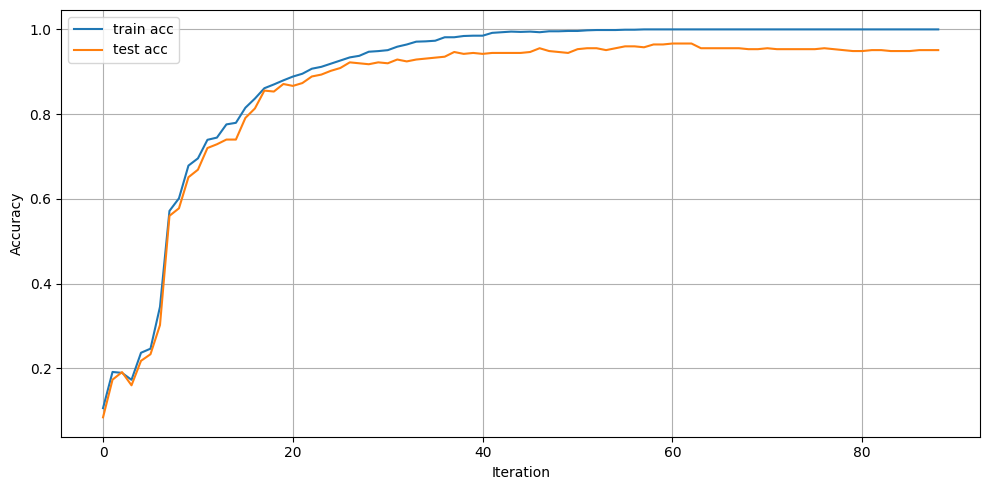

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label="train acc")
ax.plot(cb.test_acc, label="test acc")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

### `Эксперименты с числом слоев (0.6 балла)`

Ясно, что из-за случайного начального приближения с каждым запуском обучения мы будем получать различное качество. Попробуем обучить нашу нейросеть с разным числом слоев несколько раз.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети с $i+1$ полносвязными слоями при $j$-м запуске (все запуски идентичны).

In [38]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [39]:
for i in range(5):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, n_layers=i+1)
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(
            compute_loss_grad, weights,
            args=[network, X_train, y_train],
            method="L-BFGS-B",
            jac=True,
            callback=cb.call
        )
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j]  = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

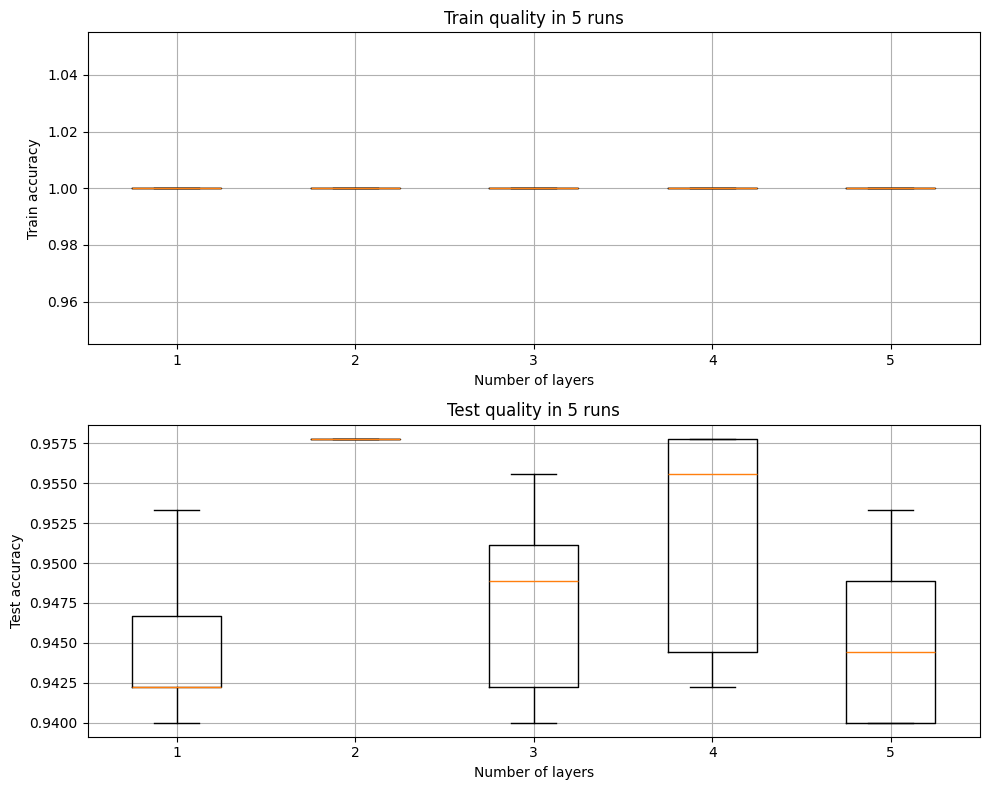

In [40]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Number of layers")
axes[1].set_xlabel("Number of layers")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как изменяются качество на обучении и контроле и устойчивость процесса обучения при увеличении числа слоев?
* Можно ли сказать, что логистическая регрессия (линейная модель) дает качество хуже, чем нелинейная модель?

__Ответы:__

* Вне зависимости от количества слоёв все модели получают качество в 1 по метрике accuracy на обучении, что говорит о том, что моедли идеально подстраиваются под обучающую выборку. При увелечении слоёв модели начинают показывать более высокое качество на контроле, но на 5 слоях качество уменьшается, что можно объяснить более частыми остановками модели в локальных экстремумах, а не глобальном.

* Одназначно ответить на этот вопрос нельзя, т.к. модель с 5 слоями показывает себя хуже по accuracy чем линейная, а другие нелинейные - лучше

### `Эксперименты c различными инициализациями весов (0.6 балла)`

Как уже было сказано, начальная инициализация весов нейронной сети может сильно влиять на процесс ее обучения и, как следствие, на ее качество.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными инициализациями слоев.

Для этого необходимо реализовать функцию, инициализирующую веса линейных слоёв нашей нейронной сети. Добавьте в функционал данного метода возможность инициализировать его веса с помощью инициализации Kaiming (используется, если в нейронной сети в качестве функций активации используется ReLU) и инициализации Xavier (используется, если в нейронной сети в качестве функций активации используется Tanh или Sigmoid):

In [41]:
def initialize_network(network, initialization):
    for layer in network:
        if isinstance(layer, Dense):
            input_units, output_units = layer.weights.shape
            if initialization == 'Kaiming':
                layer.weights = np.random.randn(input_units, output_units) * np.sqrt(2 / input_units)
            elif initialization == 'Xavier':
                layer.weights = np.random.randn(input_units, output_units) * np.sqrt(2 / (input_units + output_units))
            else:
                # Initialize weights with small random numbers from normal distribution.
                # In this case `initialization` represents a standard deviation
                # for normal distribution.
                layer.weights = np.random.randn(input_units, output_units) * initialization
            layer.biases = np.zeros_like(layer.biases)

            layer.params = [layer.weights, layer.biases]

Теперь попробуйте для каждой из 3 инициализаций обучить нейронную сеть несколько раз. Попробуйте проделать данную операцию при зафиксированном числе слоев равным 3, 4 и 5.

#### `3 слоя`

Зафиксируйте в сети число слоев равное трем.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с инициализацией Kaiming при $i = 3$, с инициализацией Xavier при $i = 4$ и с инициализацией из нормального распределения с фиксированными параметрами при $0 \leqslant i \leqslant 2$ (попробуйте здесь 3 разных параметра для стандартного отклонения для нормального распределения, например: `1e-3`, `1e-2`, `1e-1`). Заметьте, что при большом числе слоев слишком низкое стандартное отклонение может не давать нейронной сети нормально обучиться.

In [42]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [43]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [44]:
for i, init_val in enumerate(init_vars):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, n_layers=3)
        initialize_network(network, init_val)
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(
            compute_loss_grad, weights,
            args=[network, X_train, y_train],
            method="L-BFGS-B",
            jac=True,
            callback=cb.call
        )
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j]  = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

<ipython-input-45-f24671efa300>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)


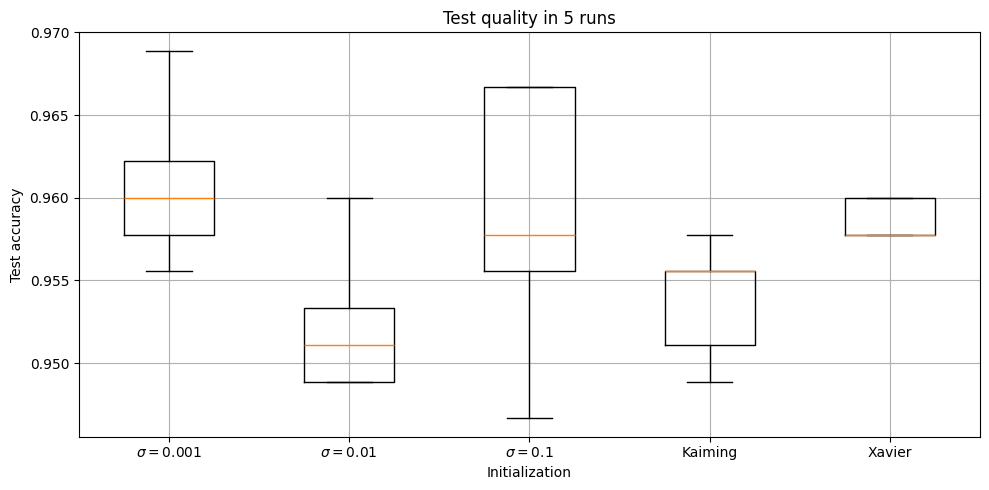

In [45]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

#### `4 слоя`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 4 слоями в сети.

In [46]:
init_vars = [5e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [47]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [48]:
for i, init_val in enumerate(init_vars):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, n_layers=4)
        initialize_network(network, init_val)
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(
            compute_loss_grad, weights,
            args=[network, X_train, y_train],
            method="L-BFGS-B",
            jac=True,
            callback=cb.call
        )
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j]  = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

<ipython-input-49-f24671efa300>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)


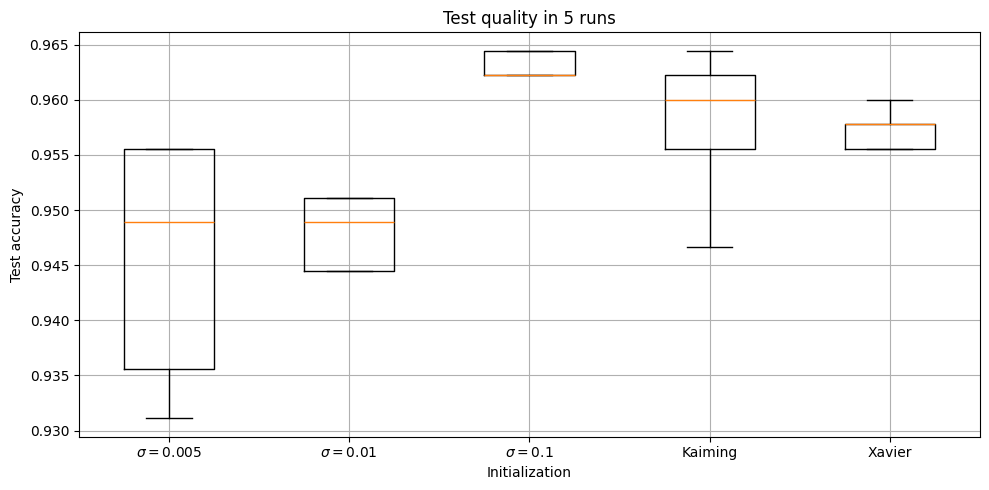

In [49]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

#### `5 слоев`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 5 слоями в сети.

In [50]:
init_vars = [1e-2, 1e-1, 1e0, 'Kaiming', 'Xavier']

In [51]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [52]:
for i, init_val in enumerate(init_vars):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, n_layers=5)
        initialize_network(network, init_val)
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(
            compute_loss_grad, weights,
            args=[network, X_train, y_train],
            method="L-BFGS-B",
            jac=True,
            callback=cb.call
        )
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j]  = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

<ipython-input-53-f24671efa300>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)


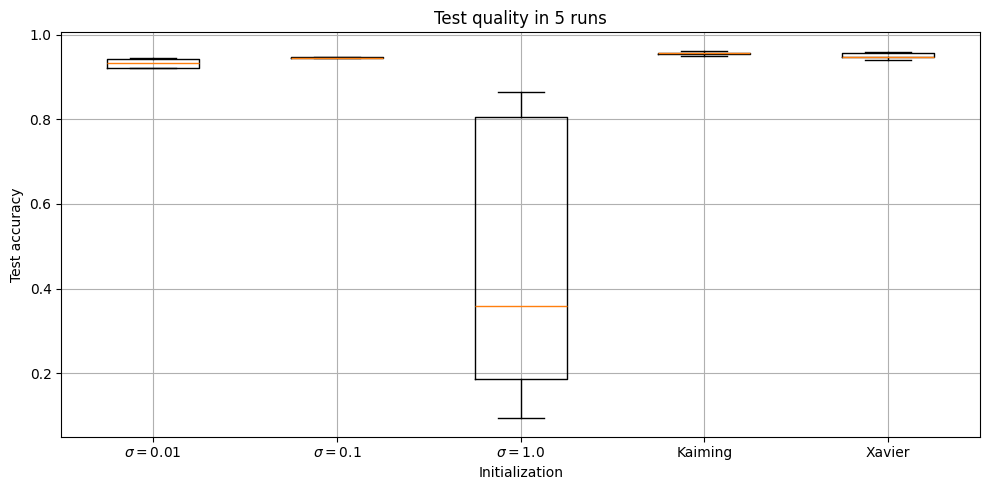

In [53]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.boxplot(accs_test.T, labels=init_vars_for_plot, showfliers=False)

ax.set_title("Test quality in 5 runs")
ax.set_xlabel("Initialization")
ax.set_ylabel("Test accuracy")
ax.grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных инициализациях?
* Какие инициализации помогают обучать более глубокие сети?

__Ответы:__
Модели с инифиализацией с нормальным распределением и наименьшей дисперсией показывают чаще всего менее устойивыми относительно других. С увеличением дисперсии модели с 4 слоями на контроле показывают увеличение accuracy, а с 3 и 5 слоями - нельзя сказать однозначно. Наиболее стабильно себя показывают себя инициализации Kaiming и Xavier, которые помогают обучать более глубокие сети

Теперь сравним скорость обучения при различных инициализациях. Создайте два списка списков `accs_test_on_iterations`, `accs_train_on_iterations` в каждом из которых в позиции `[i]` (см. описание `i` в предыдущем пункте) будет лежать список из значений `accuracy` на тестовой и обучающей выборках соотвественно, полученных во время обучения модели. Количество слоев в сети зафиксируйте равным 4.

In [54]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [55]:
accs_test_on_iterations = []
accs_train_on_iterations = []

In [56]:
for i, init_val in enumerate(init_vars):
    network = make_network(input_size, hidden_layers_size, output_size, n_layers=4, activation_class=ReLU)
    initialize_network(network, init_val)
    weights = get_weights(network)
    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
    res = minimize(
        compute_loss_grad,
        weights,
        args=[network, X_train, y_train],
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_train_on_iterations.append(cb.train_acc)
    accs_test_on_iterations.append(cb.test_acc)

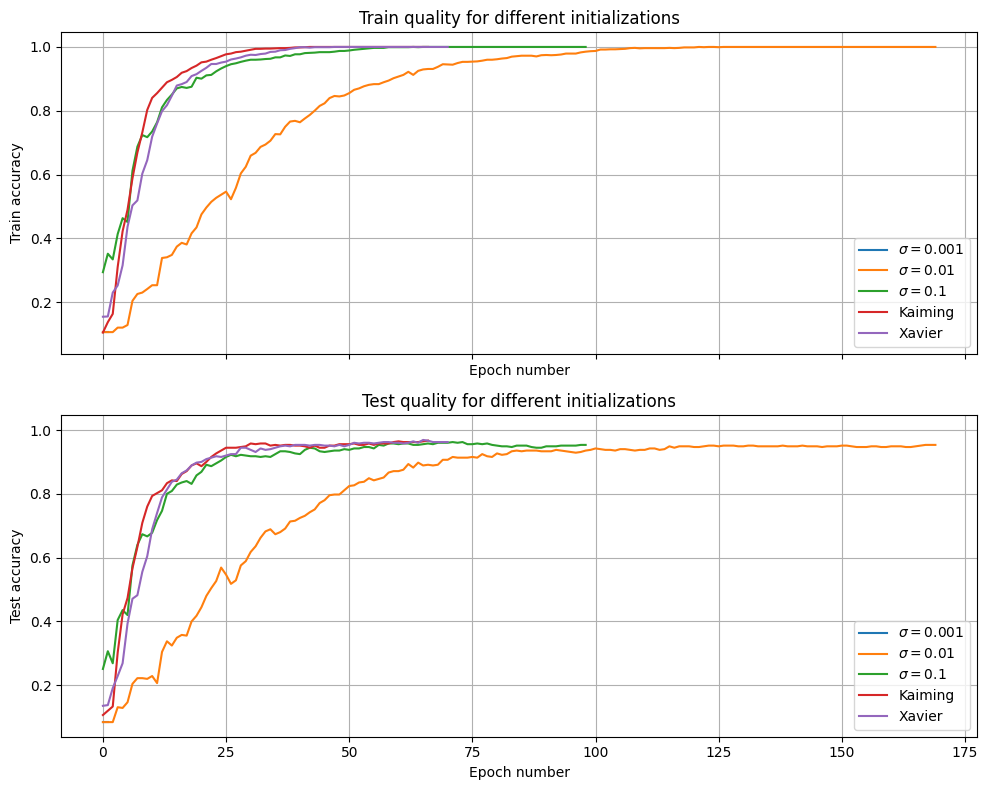

In [57]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True,  figsize=(10, 8))

for idx, label in enumerate(init_vars_for_plot):
    ax[0].plot(accs_train_on_iterations[idx], label=label)
    ax[1].plot(accs_test_on_iterations[idx], label=label)

for idx, key in enumerate(["Train", "Test"]):
    ax[idx].set_title(f"{key} quality for different initializations")
    ax[idx].set_xlabel("Epoch number")
    ax[idx].set_ylabel(f"{key} accuracy")
    ax[idx].grid(True)
    ax[idx].legend()



fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как меняется скорость обучения в зависимости от выбранной инициализации?

__Ответы:__

Модели с инициализациями Kaiming и Xavier обучаются наиболее быстро. Модель с нормальным распределением и минимльной дисперсией заканчивает обучение буквально после пары итераций (из-за чего ее график не видно на графике), скорее всего заканчивая свое обучение в локальном минмуме NLL

### `Эксперименты c различными функциями активации (0.6 балла)`

Проверим теперь, с какой функцией активации нейронная сеть будет обучаться лучше.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными функциями активации.

Для этого нам нужно реализовать еще 2 слоя: для функций активации `Tanh` и `Sigmoid`.

In [58]:
class Tanh:
    """
    tanh(y) = (e^y - e^(-y)) / (e^y + e^(-y))
    Используйте функцию np.tanh для подсчета гиперболического тангенса.
    Вы можете сами реализовать подсчет tanh, но тогда вам нужно устойчиво его вычислять.
    """
    def __init__(self):
        self.params = [] # Tanh has no parameters

    def forward(self, input):
        """
        Apply elementwise Tanh to [batch, num_units] matrix
        """
        self.out = np.tanh(input)
        return self.out

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Tanh input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return grad_output * (1 - self.out ** 2), []

    def __repr__(self):
        return 'Tanh()'

In [59]:
from scipy.special import expit

class Sigmoid:
    """
    sigmoid(y) = 1 / (1 + e^(-y))
    Используйте функцию expit для подсчета сигмоиды.
    Вы можете сами реализовать подсчет сигмоиды, но тогда вам нужно устойчиво ее вычислять.
    """
    def __init__(self):
        self.params = [] # Sigmoid has no parameters

    def forward(self, input):
        """
        Apply elementwise Sigmoid to [batch, num_units] matrix
        """
        self.expit = expit(input)
        return self.expit

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Sigmoid input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return grad_output * (self.expit * (1 - self.expit)), []

    def __repr__(self):
        return 'Sigmoid()'

Теперь попробуйте для каждой из 3 функций активации обучить нейронную сеть несколько раз. Число слоев зафиксируйте равным 3. В случае `Tanh` и `Sigmoid` используйте инициализацию `Xavier`, а в случае `ReLU` используйте инициализацию `Kaiming`.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с функцией активации $ReLU$ при $i = 0$, с функцией активации $Tanh$ при $i = 1$ и с функцией активации $Sigmoid$ при $i = 2$.

In [72]:
act_func_vars = ['Tanh', 'Sigmoid', 'ReLU']
init_for_act_funcs = ['Xavier', 'Xavier', 'Kaiming']

In [73]:
accs_train = np.zeros((3, 5))
accs_test = np.zeros((3, 5))

In [74]:
act_vars = [Tanh, Sigmoid, ReLU]

for i in range(3):
    for j in range(5):
        network = make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=act_vars[i])
        initialize_network(network, init_for_act_funcs[i])
        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        res = minimize(
            compute_loss_grad, weights,
            args=[network, X_train, y_train],
            method="L-BFGS-B",
            jac=True,
            callback=cb.call
        )
        accs_train[i, j] = cb.train_acc[-1]
        accs_test[i, j] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

<ipython-input-75-22873b2015ea>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot(accs_train.T, labels=act_func_vars, showfliers=False)
<ipython-input-75-22873b2015ea>:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot(accs_test.T, labels=act_func_vars, showfliers=False)


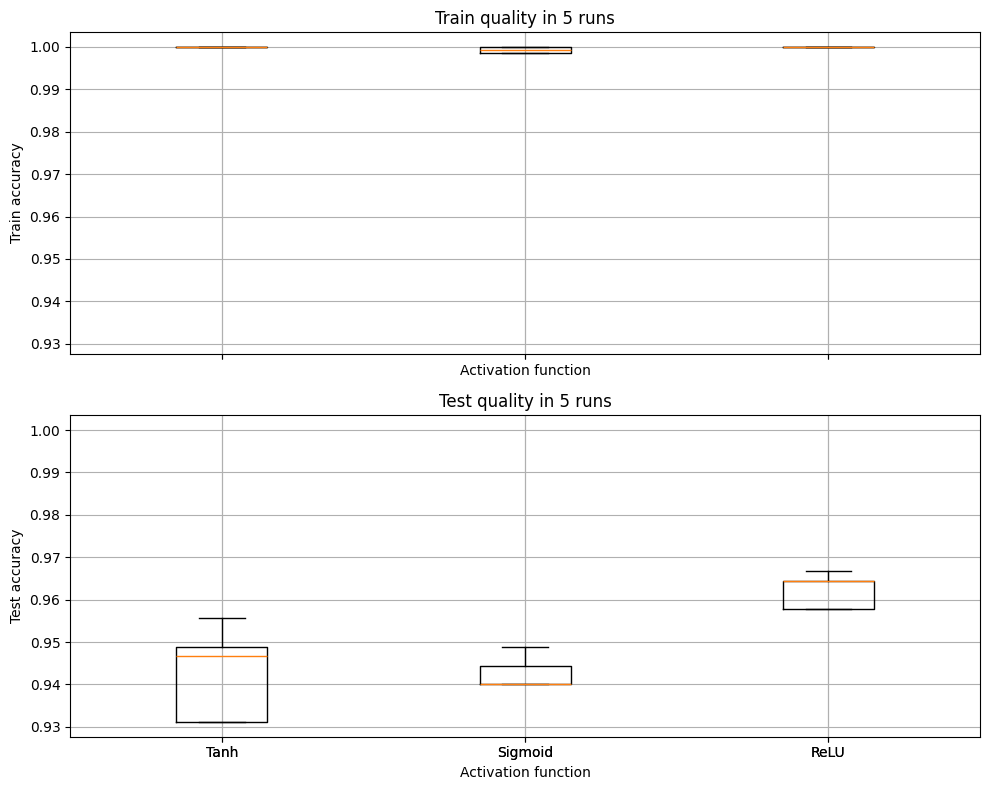

In [75]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True,  figsize=(10, 8))

ax[0].boxplot(accs_train.T, labels=act_func_vars, showfliers=False)
ax[1].boxplot(accs_test.T, labels=act_func_vars, showfliers=False)

ax[0].set_title("Train quality in 5 runs")
ax[1].set_title("Test quality in 5 runs")

ax[0].set_xlabel("Activation function")
ax[1].set_xlabel("Activation function")

ax[0].set_ylabel("Train accuracy")
ax[1].set_ylabel("Test accuracy")

ax[0].grid(True)
ax[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных функциях активации?

__Ответы:__

На обучении качество моделей не отличается. На контроле лучше всего показывает себя ReLU с точки зрения целевой метрики (accuracy), а с точки зрения устойчивости - Sigmoid

\* Несколько фрагментов кода в задании написаны на основе материалов [курса по глубинному обучению на ФКН НИУ ВШЭ](https://www.hse.ru/ba/ami/courses/205504078.html)

### `Реализация метода оптимизации (1.4 балла)`

В этой части задания реализуйте метод оптимизации SGD + momentum. Упрощённая версия более общего алгоритма [отсюда](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html):

$$
\begin{aligned}
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{input}      : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: X \text{ (data)},       \\
    &\hspace{13mm} \: f(\theta) \text{ (objective)}, \:\mu \text{ (momentum)}       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{for} \: t=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{5mm}\mathcal{X} \leftarrow \texttt{list\_of\_random\_batches}(X)\\
    &\hspace{5mm}\textbf{for} \: i=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{10mm}g_t\leftarrow   \nabla_{\theta} f_t (\theta_{t-1},\mathcal{X}_i)      \\
    &\hspace{10mm}\textbf{if} \: \mu \neq 0                                          \\
    &\hspace{15mm}\textbf{if} \: t > 1                                              \\
    &\hspace{20mm} \textbf{b}_t \leftarrow \mu \textbf{b}_{t-1} + g_t               \\
    &\hspace{15mm}\textbf{else}                                                     \\
    &\hspace{20mm} \textbf{b}_t \leftarrow g_t                                      \\
    &\hspace{15mm} g_t  \leftarrow  \textbf{b}_t                                     \\
    &\hspace{10mm}\theta_t \leftarrow \theta_{t-1} - \gamma g_t                      \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
    &\bf{return} \:  \theta_t                                                       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
\end{aligned}
$$

Проще всего будет написать `custom minimizer` (смотри [документацию scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)).

In [76]:
from scipy.optimize import OptimizeResult


def SGD(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs['callback']   # feed weights from each iteration to update network and log metrics
    mu = kwargs['momentum']
    n_iter = kwargs['n_iter']
    gamma = kwargs['lr']
    jac = kwargs['jac']
    batch_size = kwargs['batch_size']

    net, X, y = args
    weights = x0.copy()
    n_samples = len(X)
    for epoch in range(n_iter):
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        for i in range(0, n_samples, batch_size):
            batch_idx = indices[i:i + batch_size]
            X_batch = X[batch_idx]
            y_batch = y[batch_idx]
            grad = jac(weights, (net, X_batch, y_batch))
            if mu != 0:
                b = mu * b + grad if epoch > 0 else grad
                grad = b
            weights = weights - gamma * grad
        callback(weights)

    result = OptimizeResult()
    result.x = weights
    result.nit = n_iter
    result.success = True
    return result

**Задание 1. (0.5 балла)** Продемонстрируйте правильную работу метода оптимизации, получив `test_accuracy>=0.9`.

In [77]:
network = make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=Tanh)
initialize_network(network, 'Xavier')
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
weights = get_weights(network)

sgd_options = {'momentum': 0.9, 'n_iter': 1000, 'lr': 0.001, 'batch_size': 40}

res = minimize(
    compute_loss_grad, weights,
    args=(network, X_train, y_train),
    method=SGD,
    options=sgd_options,
    jac=True,
    callback=cb.call
)
print('accuracy =', np.mean(predict(network, X_test) == y_test))

accuracy = 0.96


**Задание 2. (0.8 балла)** Сравните три алгоритма:
1. LBFGS-B
2. SGD
3. SGD + momentum

Для этого одновременно переберите следующие гиперпараметры:
- значения `lr` на отрезке `[1e-3, 1e-1]` по логарифмической сетке
- два значения `momentum`: `0` и `0.9`
- значения `batch_size`: `8` и `32`

В каждом запуске сохраняйте три метрики: итоговое accuracy на тесте и на трейне и время обучения.

Для каждого из трёх алгоритмов выберите лучшие `lr` и `batch_size` по `test_accuracy`. Постройте для них кривые обучения (пример ниже). Сделайте выводы.

![](comparison.svg)

In [78]:
network = make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=Tanh)
initialize_network(network, 'Xavier')
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
weights = get_weights(network)

res = minimize(
    compute_loss_grad, weights,
    args=[network, X_train, y_train],
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)
print('Train accuracy: ', cb.train_acc[-1])
print('Test accuracy: ', cb.test_acc[-1])

Train accuracy:  1.0
Test accuracy:  0.9422222222222222


In [79]:
accuracy_train_SGD = []
accuracy_test_SGD = []

In [80]:
lr_arr = np.logspace(-3, -1, num=8)
for lr_i in lr_arr:
    for batch_size in [8, 32]:
        network = make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=Tanh)
        initialize_network(network, 'Xavier')
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        weights = get_weights(network)

        sgd_options = {'momentum': 0, 'n_iter': 300, 'lr': lr_i, 'batch_size': batch_size}

        res = minimize(
            compute_loss_grad, weights,
            args=(network, X_train, y_train),
            method=SGD,
            options=sgd_options,
            jac=True,
            callback=cb.call
        )
        accuracy_train_SGD.append(cb.train_acc[-1])
        accuracy_test_SGD.append(cb.test_acc[-1])

In [81]:
print(np.argmax(accuracy_test_SGD))
print('best accuracy: ', max(accuracy_test_SGD))

11
best accuracy:  0.9711111111111111


In [82]:
accuracy_train_SGD_momentum = []
accuracy_test_SGD_momentum = []

In [83]:
for lr_i in lr_arr:
    for batch_size in [8, 32]:
        network = make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=Tanh)
        initialize_network(network, 'Xavier')
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
        weights = get_weights(network)

        sgd_options = {'momentum': 0.9, 'n_iter': 300, 'lr': lr_i, 'batch_size': batch_size}

        res = minimize(
            compute_loss_grad, weights,
            args=(network, X_train, y_train),
            method=SGD,
            options=sgd_options,
            jac=True,
            callback=cb.call
        )
        accuracy_train_SGD_momentum.append(cb.train_acc[-1])
        accuracy_test_SGD_momentum.append(cb.test_acc[-1])

In [84]:
print(np.argmax(accuracy_test_SGD_momentum))
print('best accuracy: ', max(accuracy_test_SGD_momentum))

7
best accuracy:  0.9688888888888889


In [85]:
import time
best_accuracy_train_LBFGS = []
best_accuracy_test_LBFGS = []

network = make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=Tanh)
initialize_network(network, 'Xavier')
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
weights = get_weights(network)
start_time = time.time()
res = minimize(
    compute_loss_grad, weights,
    args=[network, X_train, y_train],
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)
print('L-BFGS-B train time:', time.time() - start_time)
best_accuracy_train_LBFGS = cb.train_acc
best_accuracy_test_LBFGS = cb.test_acc

L-BFGS-B train time: 2.6008858680725098


In [86]:
print(lr_arr)

[0.001      0.0019307  0.00372759 0.00719686 0.01389495 0.02682696
 0.05179475 0.1       ]


In [87]:
best_accuracy_train_SGD = []
best_accuracy_test_SGD = []

network = make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=Tanh)
initialize_network(network, 'Xavier')
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
weights = get_weights(network)
sgd_options = {'momentum': 0, 'n_iter': 300, 'lr': 0.01389495 , 'batch_size': 8}
start_time = time.time()
res = minimize(
    compute_loss_grad, weights,
    args=(network, X_train, y_train),
    method=SGD,
    options=sgd_options,
    jac=True,
    callback=cb.call
)
print('SGD train time:', time.time() - start_time)
best_accuracy_train_SGD = cb.train_acc
best_accuracy_test_SGD = cb.test_acc

SGD train time: 31.489452600479126


In [88]:
best_accuracy_train_SGD_momentum = []
best_accuracy_test_SGD_momentum = []

network = make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=Tanh)
initialize_network(network, 'Xavier')
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)
weights = get_weights(network)
sgd_options = {'momentum': 0, 'n_iter': 300, 'lr': 0.001, 'batch_size': 8}
start_time = time.time()
res = minimize(
    compute_loss_grad, weights,
    args=(network, X_train, y_train),
    method=SGD,
    options=sgd_options,
    jac=True,
    callback=cb.call
)
print('SGD + momentum train time:', time.time() - start_time)
best_accuracy_train_SGD_momentum = cb.train_acc
best_accuracy_test_SGD_momentum = cb.test_acc

SGD + momentum train time: 31.149417877197266


In [89]:
acc_train = [best_accuracy_train_LBFGS, best_accuracy_train_SGD, best_accuracy_train_SGD_momentum]
acc_test = [best_accuracy_test_LBFGS, best_accuracy_test_SGD, best_accuracy_test_SGD_momentum]
vars = ['LBFGS', 'SGD', 'SGD + momentum']

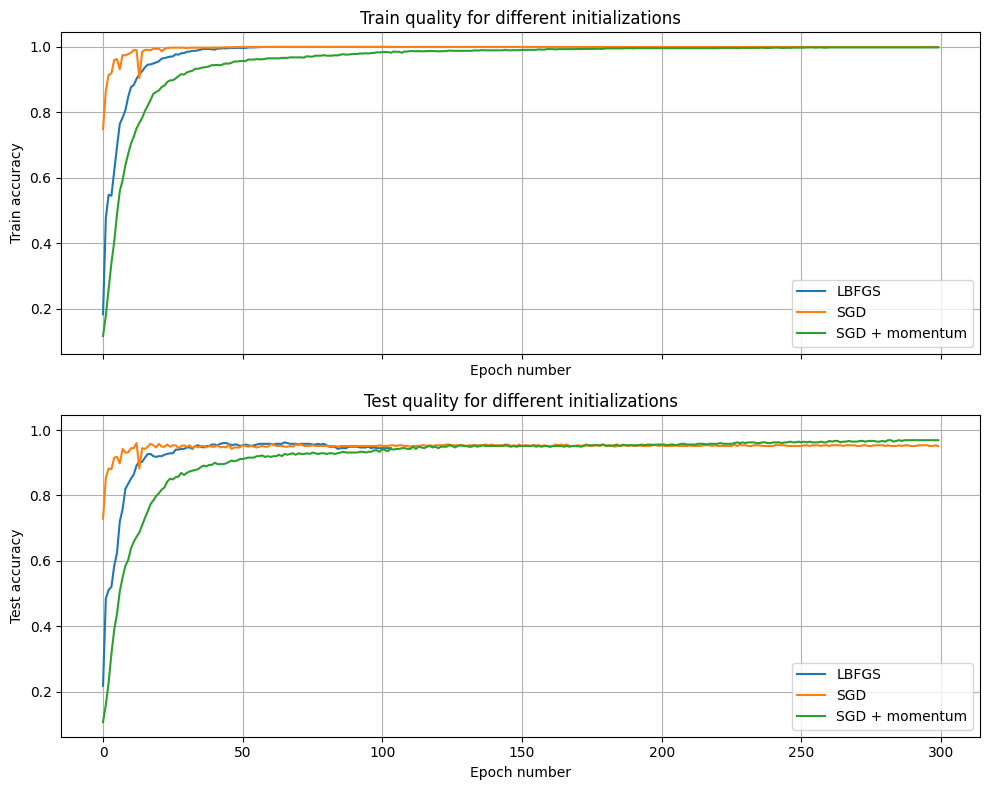

In [90]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True,  figsize=(10, 8))

for idx, label in enumerate(vars):
    ax[0].plot(range(len(acc_train[idx])), acc_train[idx], label=label)
    ax[1].plot(range(len(acc_train[idx])), acc_test[idx], label=label)

for idx, key in enumerate(["Train", "Test"]):
    ax[idx].set_title(f"{key} quality for different initializations")
    ax[idx].set_xlabel("Epoch number")
    ax[idx].set_ylabel(f"{key} accuracy")
    ax[idx].grid(True)
    ax[idx].legend()



fig.tight_layout()
plt.show()

**Выводы:** L-BFG-S сходится намного быстрее других методов при примерно одинаковом качестве на контроле, поэтому является более оптимальным

**Задание 3. (0.1 балла)** Для отобранных в прошлом задании трёх алгоритмов ответье на вопрос: как меняются запуски для двух значений `batch_size`.

**Ответ:**

## `Бонусная часть`

### `Реализация метода оптимизации (1 балл)`

Реализуйте метод оптимизации Adam и сравните его работу с SGD + momentum, проведя эксперимент, как в задании 2 (перебор гиперпараметров + кривые обучения).

### `Dropout (1 балл)`

Реализуйте слой Dropout. Сравните обучение сети из большого числа слоёв при использовании Dropout и без его использования (предварительно подберите адекватный параметр $p$). Сделайте выводы.

### `BatchNormalization (1 балл)`

Реализуйте слой `BatchNormalization`. Сравните обучение сети из большого числа слоёв при использовании `BatchNormalization` и без его использования. Сделайте выводы.